# Sine wave prediction using recurrent neural network (GRU - Gated Recurrent Unit)
Special thanks to:
- https://medium.com/@krzysztofbalka/training-keras-lstm-to-generate-sine-function-2e3c0ca42c3b
- https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/6.3-advanced-usage-of-recurrent-neural-networks.ipynb

Other sources:
- https://datascience.stackexchange.com/questions/31923/training-an-lstm-to-track-sine-waves
- https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
- https://stackoverflow.com/questions/43117654/many-to-many-sequence-prediction-with-different-sequence-length


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# define a function to learn
def train_function(x):
    return np.sin(x)

# generate inputs and labels
def split_sequence(sequence, n_steps):
    X, y = [], []
    
    for i in range(len(sequence)):
        end_idx = i + n_steps
        
        if end_idx > len(sequence) - 1:
            break
        
        seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
        
        X.append(seq_x)
        y.append(seq_y)
        
    return np.array(X), np.array(y)
    
x_axis = np.arange(-50 * np.pi, 50 * np.pi, 0.1)
y_axis = train_function(x_axis)
n_points = 20

X, y = split_sequence(y_axis, n_points)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

print("X.shape = {}".format(X.shape))
print("y.shape = {}".format(y.shape))

X.shape = (3122, 20, 1)
y.shape = (3122,)


(-2, 2)

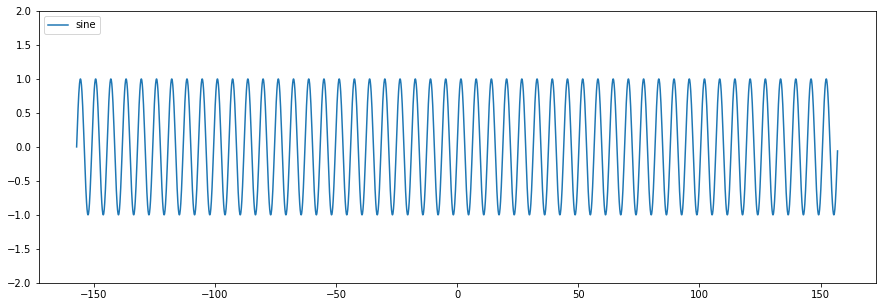

In [3]:
plt.figure(figsize=(15,5))
plt.plot(x_axis, y_axis, label="sine")
plt.legend(loc='upper left')
plt.ylim(-2, 2)

In [4]:
model = Sequential()

model.add(GRU(
    10,
    activation='tanh',
    recurrent_activation='sigmoid',
#    dropout=0.1,
#    recurrent_dropout=0.1,
    return_sequences=False,
    input_shape=(n_points, 1)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [5]:
epochs = 10
history = model.fit(X, y, epochs=epochs, verbose=1)

Train on 3122 samples
Epoch 1/10
3122/3122 [==============================] - 2s 791us/sample - loss: 0.5665
Epoch 2/10
3122/3122 [==============================] - 1s 255us/sample - loss: 0.1129
Epoch 3/10
3122/3122 [==============================] - 1s 265us/sample - loss: 0.0255
Epoch 4/10
3122/3122 [==============================] - 1s 260us/sample - loss: 0.0145
Epoch 5/10
3122/3122 [==============================] - 1s 265us/sample - loss: 0.0080
Epoch 6/10
3122/3122 [==============================] - 1s 265us/sample - loss: 0.0035
Epoch 7/10
3122/3122 [==============================] - 1s 260us/sample - loss: 0.0013
Epoch 8/10
3122/3122 [==============================] - 1s 255us/sample - loss: 7.2586e-04
Epoch 9/10
3122/3122 [==============================] - 1s 260us/sample - loss: 4.7777e-04
Epoch 10/10
3122/3122 [==============================] - 1s 290us/sample - loss: 3.5430e-04


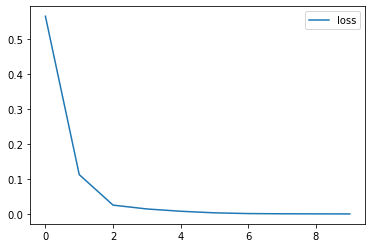

In [6]:
plt.plot(history.history['loss'], label="loss")
plt.legend(loc="upper right")
plt.show()

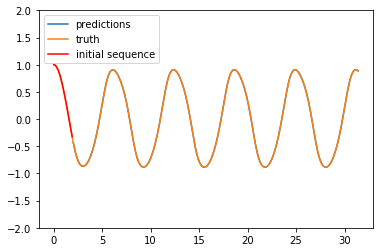

In [7]:
# test the prediction on cosine
test_x_axis = np.arange(0, 10 * np.pi, 0.1)

def test_function(x):
    return np.cos(x)

test_y_axis = test_function(test_x_axis)
# start with initial n values, rest will be predicted
test_y_axis = test_y_axis[:n_points]

results = []

for i in range(len(test_x_axis) - n_points):
    net_input = test_y_axis[i : i + n_points]
    net_input = net_input.reshape((1, n_points, n_features))
    # call NN prediction
    y = model.predict(net_input, verbose=0)
    test_y_axis = np.append(test_y_axis, y)
    
plt.plot(test_x_axis[n_points:], test_y_axis[n_points:], label="predictions")
plt.plot(test_x_axis, test_y_axis, label="truth")
plt.plot(test_x_axis[:n_points], test_y_axis[:n_points], label="initial sequence", color="red")
plt.legend(loc='upper left')
plt.ylim(-2, 2)
plt.show()